## Simple MNIST Neural Network from scratch
In this notebook, I implemented a simple two-layer neural network and trained it on the MNIST digit recognizer dataset. 

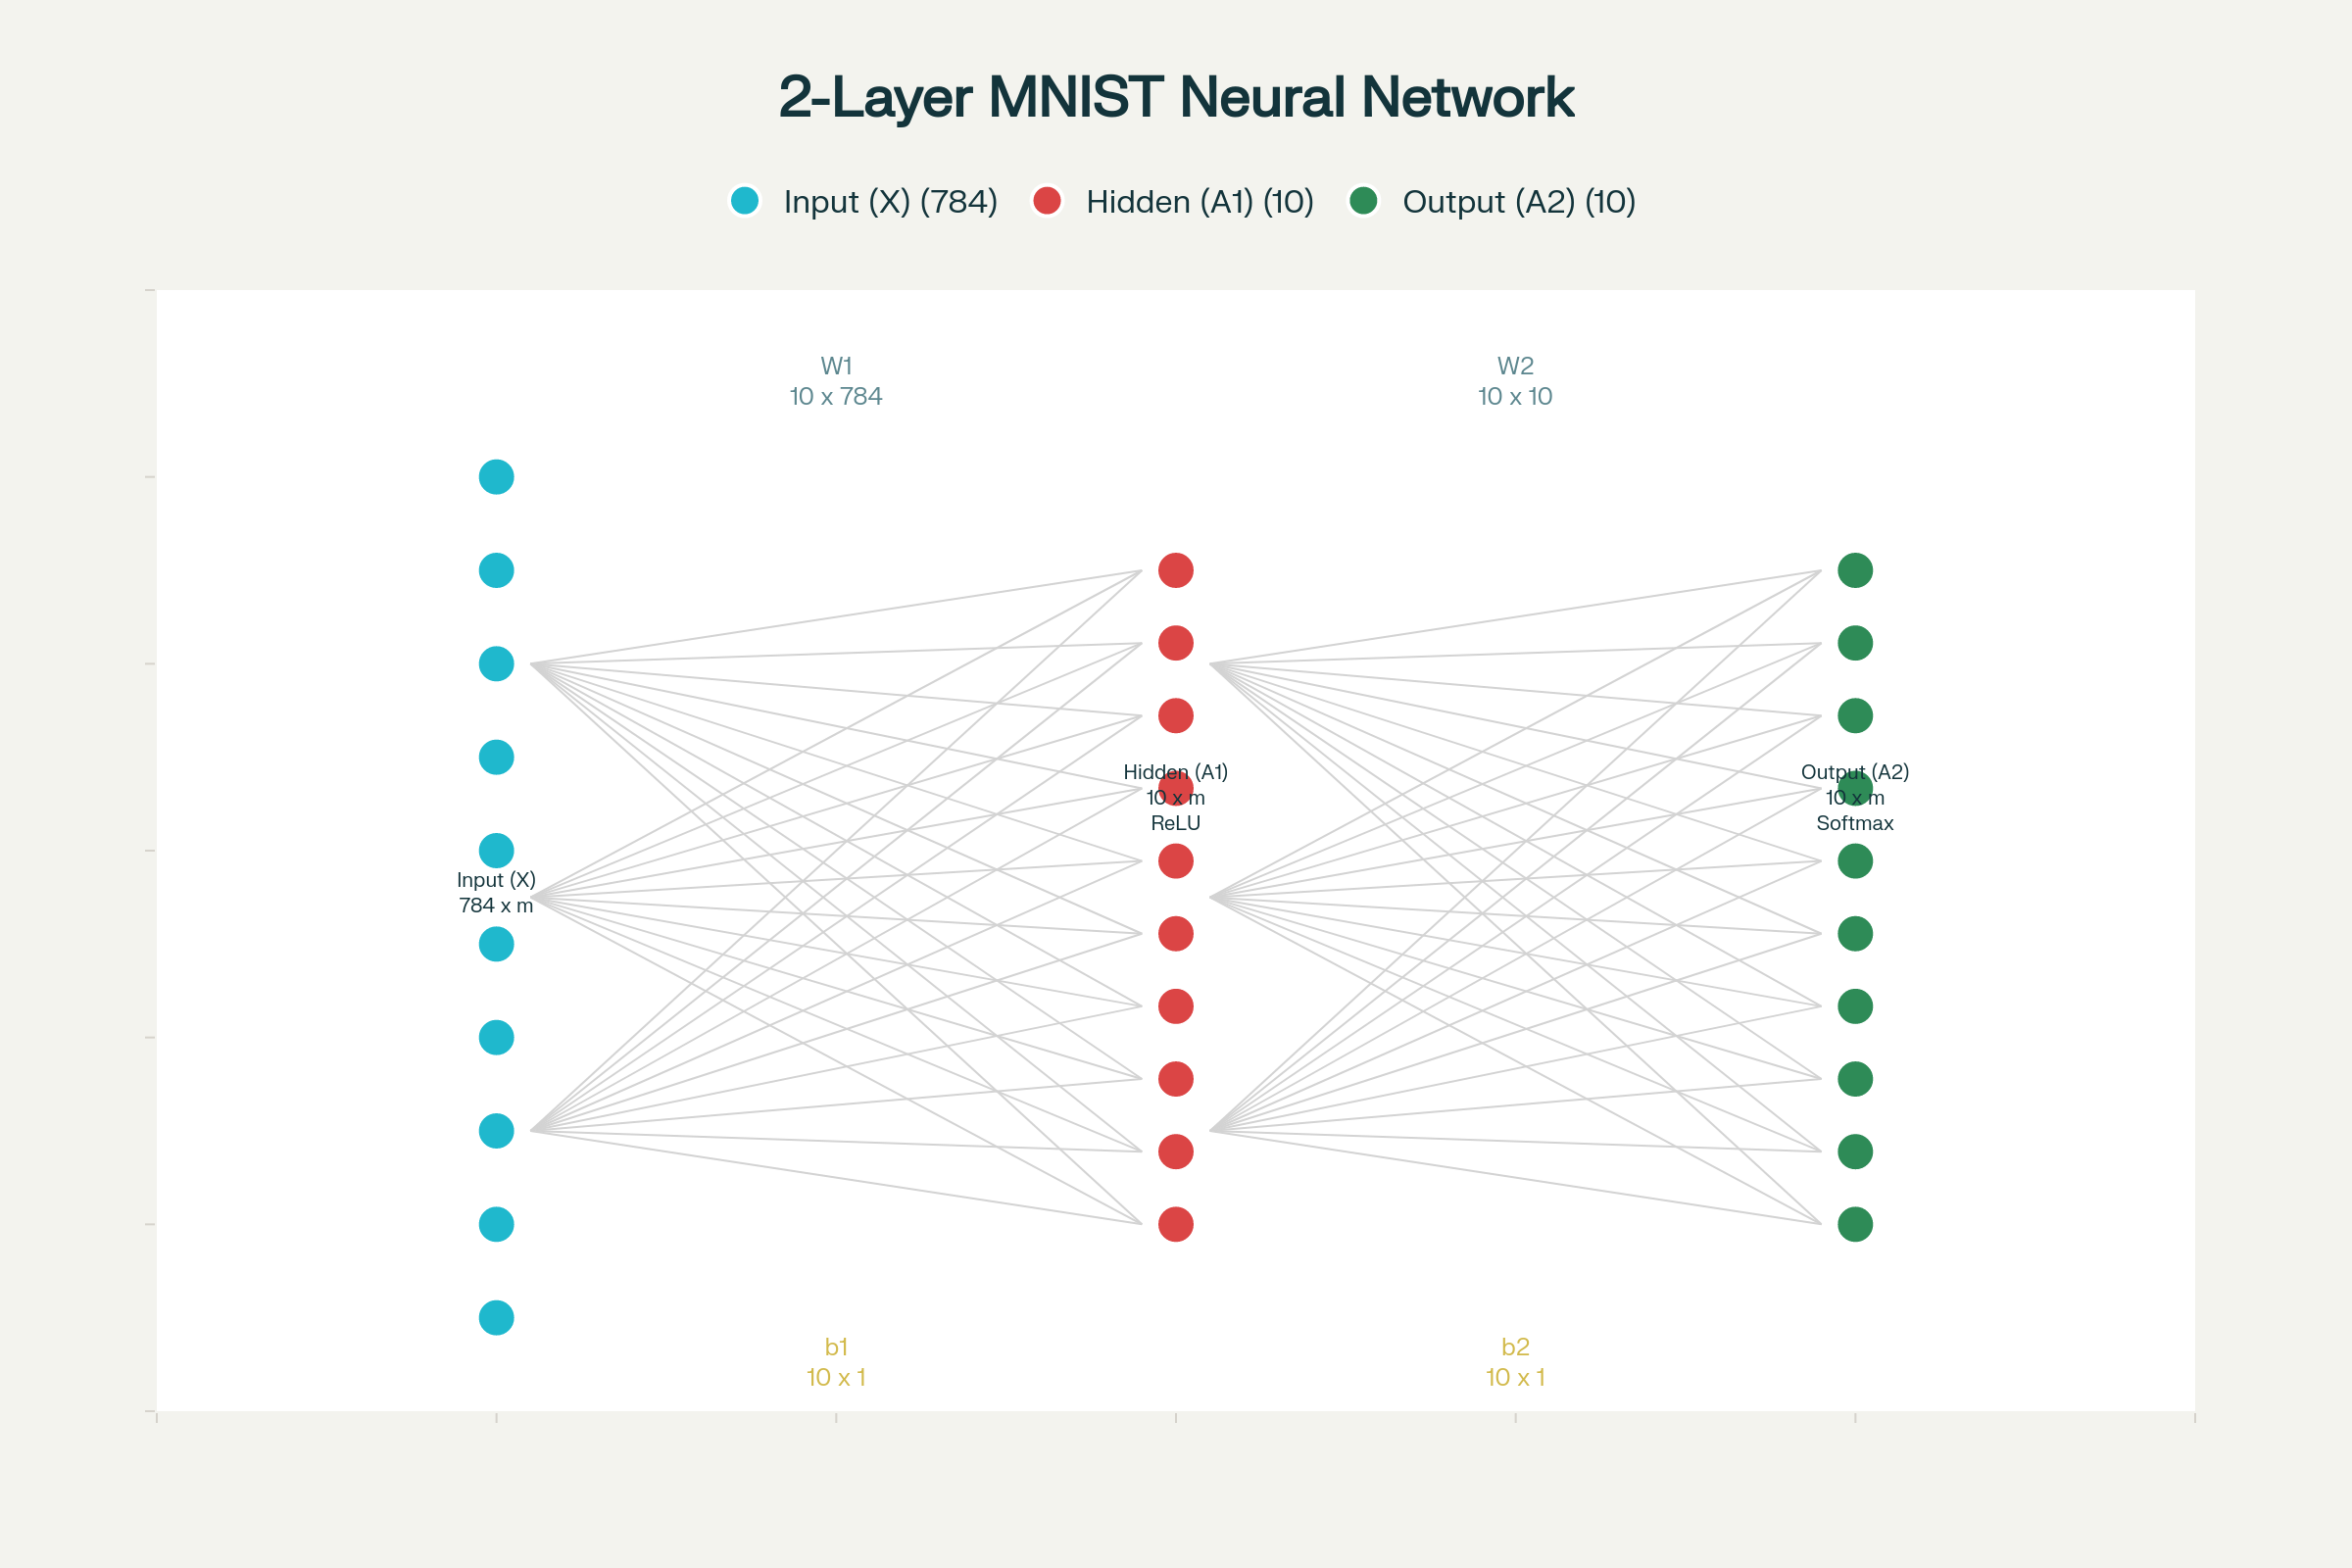

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("../Dataset/train.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


784 columns / pixels

In [4]:
df = np.array(df)

In [5]:
np.random.shuffle(df)

## Overall Maths Behind the Neural Network

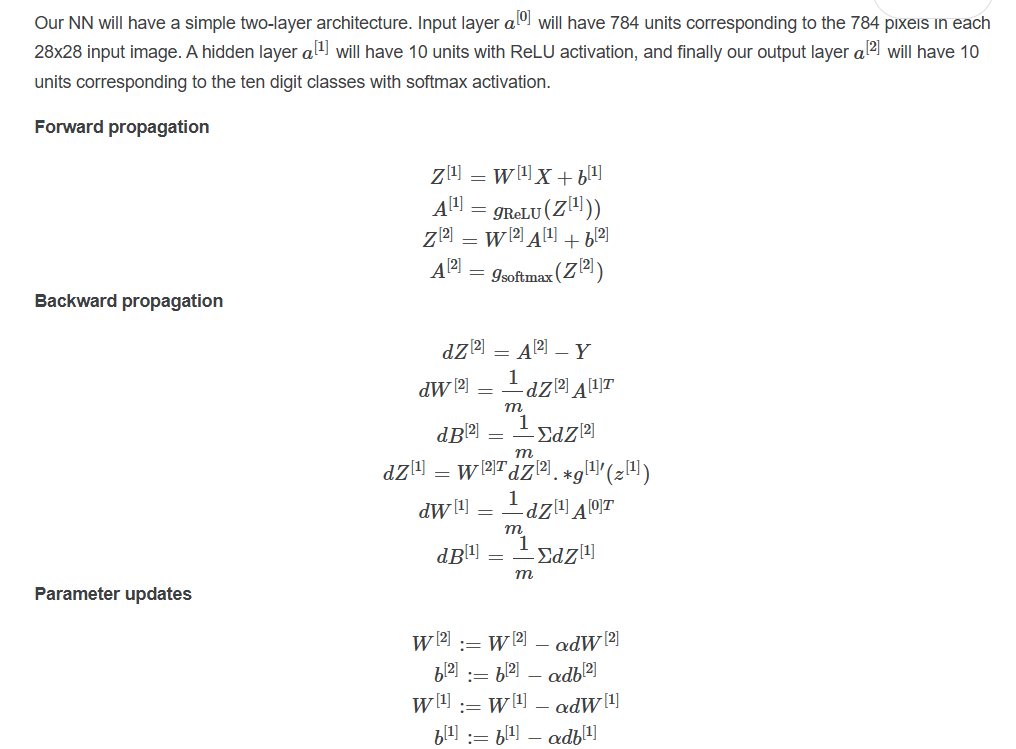

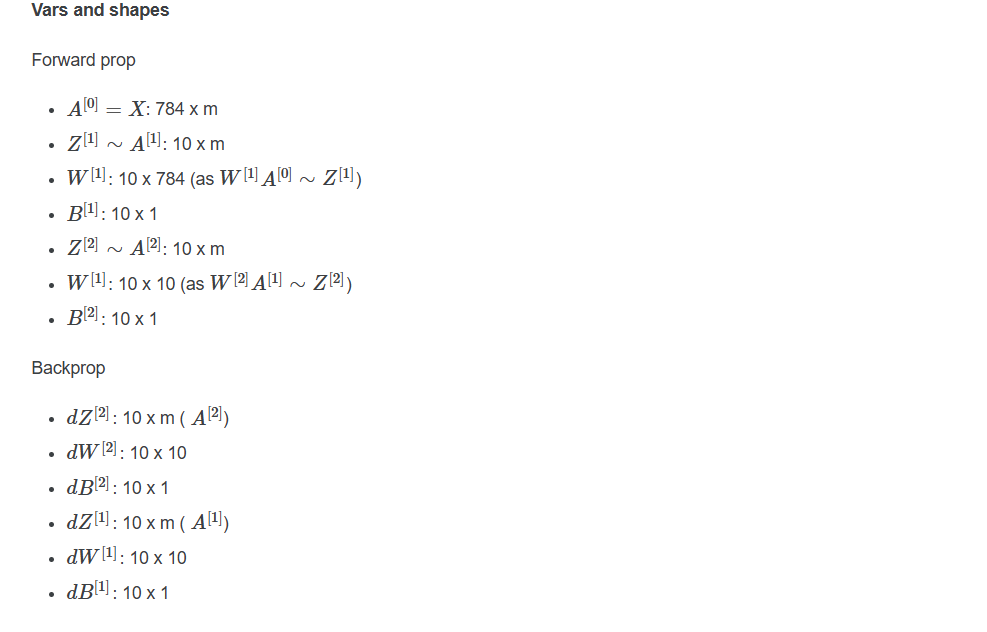

In [6]:
print(df.shape)

(42000, 785)


In [ ]:
m,n = df.shape 
# m rows m = 42000
# n columns = 785

In [80]:
#first i am trying to take first 1000 rows and transpose it so rows will become columns
dev_data = df[0:1000].T 
# Now the rows are columns and columns are rows i am taking the first row which is 'Label' depending or predicting variable
Y_dev = dev_data[0]
X_dev = dev_data[1:n] ## rest all the 784 rows  
X_dev = X_dev/255.

data_train  = df[1000:m].T ## taking rest of 1000 to other rows and transposing it so 41000 rows
# Same process for this first Label columns in y and rest in X
y_train = data_train[0] 
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [52]:
X_train.shape # as 41000 are left rest in X_dev

(784, 41000)

In [53]:
y_train.shape

(41000,)

In [54]:
m_train

41000

In [55]:

def init_params():
    ## This gives you a weight matrix of shape (10, 784) with values centered around zero
    W1 = np.random.rand(10,784) - 0.5  # So a random number will be generates values uniformly between 0 and 1 and subtracting 0.5 because we are keeping values close to 0 (good for ReLu)
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1,b1,W2,b2

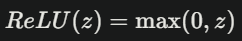

In [56]:
def ReLu(Z):
    return np.maximum(0,Z) # Negative values become 0, positive values stay the same

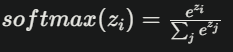

In [57]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

Math: 

- Z1 
 =W1 
 X+b1 

- A1 
 =g 
ReLU
 (Z1 
 ) where 
ReLU(z1)=max(0,z1)

- Z2 
 =W2 
 A1 
 +b2

- A2
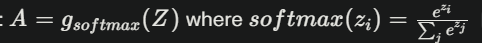
 
 



In [58]:
def forward_propagation(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    # X has shape (784, m) where m = number of examples m =41000
    # W1.dot(X) multiplies (10×784) × (784×m) = (10×m) # Matrix multiplication
    # Adding b1 (10×1) broadcasts to give  - Z1 shape (10×m)
    
    A1 = ReLu(Z1) # A1 has same shape as Z1: (10×m)
    
    Z2 = W2.dot(A1) + b2
    # W2.dot(A1) multiplies (10×10) × (10×m) = (10×m)
    # Adding b2 (10×1) gives Z2 shape (10×m)
    
    A2 = softmax(Z2)
    # np.exp(Z) computes e^z for each element
    # sum(np.exp(Z)) sums across all elements
    # Division gives probabilities that sum to 1
    # A2 has shape (10×m)
    
    return Z1,A1,Z2,A2

In [59]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))  # Create matrix of zeros
    one_hot_Y[np.arange(Y.size), Y] = 1          # Set correct positions to 1
    one_hot_Y = one_hot_Y.T                      # Transpose to get (10,m)
    return one_hot_Y


# Your labels are [0,1,2,...,9] but you need vectors like for math

In [60]:
def ReLu_deriv(Z):
    return Z > 0 # ReLU derivative: 1 if Z>0, else 0

 Output Layer Error
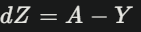

Output Layer Weight Gradients
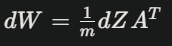

Output Layer Bias Gradients
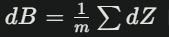

Hidden Layer Error
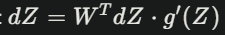

Hidden Layer Weight Gradients
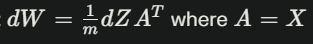

Hidden Layer Bias Gradients
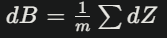

In [62]:
def back_pro(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y # - Subtracting gives the gradient of the loss w.r.t. Z2 (pre-activation of output layer)
    # one_hot(Y) converts labels [2,0,1,...] to one-hot vectors
    # If label is 2, one-hot is
    # dZ2 has shape (10×m) - this is the error at output layer
    
# This computes how much each weight and bias in the output layer contributed to the error.
    dW2 = 1/m * dZ2.dot(A1.T) 
    # dZ2.dot(A1.T) multiplies (10×m) × (m×10) = (10×10)
    # 1/m averages over the batch
    # dW2 has same shape as W2: (10×10)
    
    db2 = 1/m * np.sum(dZ2)
    # np.sum(dZ2) sums all elements in the (10×m) matrix
    # 1/m averages over the batch
    # db2 is a scalar
    
    dZ1 = W2.T.dot(dZ2) * ReLu_deriv(Z1)  # This gives the gradient of the loss w.r.t. Z1, the pre-activation of the hidden layer.
    # W2.T.dot(dZ2) multiplies (10×10)^T × (10×m) = (10×10) × (10×m) = (10×m)
    # ReLU_deriv(Z1) gives 1 where Z1>0, 0 elsewhere
    # Element-wise multiplication * applies the chain rule
    # dZ1 has shape (10×m)
    
    dW1 = 1/m * dZ1.dot(X.T)
    # dZ1.dot(X.T) multiplies (10×m) × (m×784) = (10×784)
    # 1/m averages over the batch
    # dW1 has same shape as W1: (10×784)
    
    db1 = 1/m * np.sum(dZ1)
    # Same as db2 - this should also be fixed to maintain proper shape
    
    return dW1, db1, dW2, db2

In [63]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1  # W[1] := W[1] - α * dW[1]
    b1 = b1 - alpha * db1  # b[1] := b[1] - α * db[1]    
    W2 = W2 - alpha * dW2  # W[2] := W[2] - α * dW[2]
    b2 = b2 - alpha * db2  # b[2] := b[2] - α * db[2]
    return W1, b1, W2, b2

# Each parameter moves in the opposite direction of its gradient

# alpha is the learning rate (how big steps to take)

# Larger alpha = faster learning but less stable

For each layer (W1, b1, W2, b2), you do:
- Forward pass: Use them to compute activations
- Backward pass: Compute how they contributed to error
- Update step: Adjust them to reduce future error

This cycle repeats every iteration — refining the model step by step


In [64]:
def get_predictions(A2):
    return np.argmax(A2,0) # axis = 0
#Since A2 contains probabilities, argmax finds which class has highest probability for each example.

In [65]:
def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions == Y) / Y.size


# - predictions == Y: creates a boolean array where each element is True if the prediction matches the actual label
# - np.sum(...): counts how many predictions were correct
# - Y.size: total number of samples
# - The division gives you the fraction of correct predictions — i.e., accuracy

In [66]:
def gradient_descent(X,Y,alpha,iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_propagation(W1,b1,W2,b2,X)
        dW1, db1, dW2, db2 = back_pro(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1,b1,W2,b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2,db2, alpha)
        if i % 10 == 0:
            print("Iterations: ",i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [73]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 0.10, 600)


Iterations:  0
[0 0 5 ... 5 5 9] [3 3 9 ... 8 5 8]
0.15692682926829268
Iterations:  10
[3 5 5 ... 5 5 9] [3 3 9 ... 8 5 8]
0.24553658536585365
Iterations:  20
[3 5 5 ... 1 5 9] [3 3 9 ... 8 5 8]
0.3403658536585366
Iterations:  30
[3 5 5 ... 1 5 8] [3 3 9 ... 8 5 8]
0.4181219512195122
Iterations:  40
[5 5 9 ... 1 5 8] [3 3 9 ... 8 5 8]
0.48036585365853657
Iterations:  50
[5 5 9 ... 1 5 8] [3 3 9 ... 8 5 8]
0.533
Iterations:  60
[5 5 9 ... 1 5 8] [3 3 9 ... 8 5 8]
0.5718292682926829
Iterations:  70
[5 5 9 ... 1 5 8] [3 3 9 ... 8 5 8]
0.604390243902439
Iterations:  80
[5 5 9 ... 1 5 8] [3 3 9 ... 8 5 8]
0.6306585365853659
Iterations:  90
[5 5 9 ... 1 5 8] [3 3 9 ... 8 5 8]
0.6536341463414634
Iterations:  100
[5 5 9 ... 1 5 8] [3 3 9 ... 8 5 8]
0.6734878048780488
Iterations:  110
[5 5 9 ... 1 5 8] [3 3 9 ... 8 5 8]
0.6911463414634146
Iterations:  120
[5 5 9 ... 1 5 8] [3 3 9 ... 8 5 8]
0.7066585365853658
Iterations:  130
[3 5 9 ... 8 5 8] [3 3 9 ... 8 5 8]
0.7213414634146341
Iterations:  1

In [74]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [75]:

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


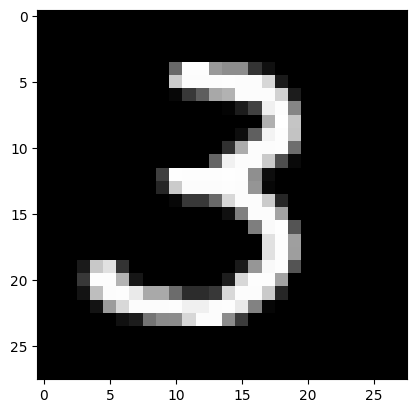

Prediction:  [3]
Label:  3


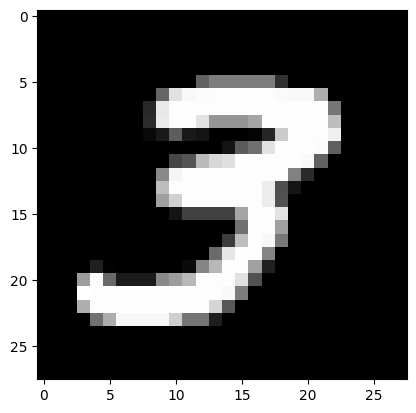

Prediction:  [9]
Label:  9


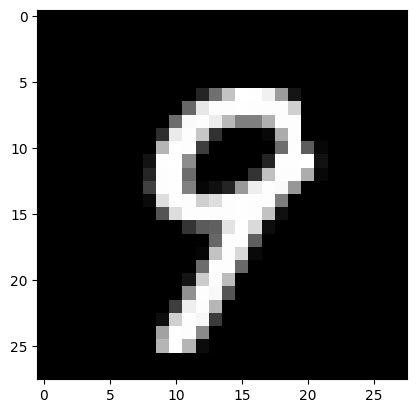

Prediction:  [5]
Label:  5


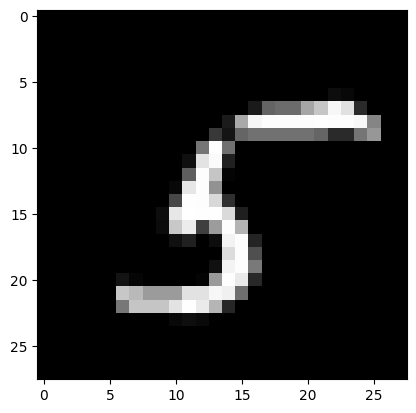

In [76]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [82]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 9 7 0 5 8 9 7 7 7 9 1 0 1 0 2 1 2 9 9 1 9 2 5 7 2 6 7 6 8 2 3 1 7 4 0 1
 9 1 1 0 2 8 9 2 5 7 7 3 9 9 5 8 5 7 8 6 1 1 9 9 7 2 5 0 1 8 7 6 0 9 4 2 3
 8 1 2 9 6 5 2 9 5 4 9 0 1 3 4 4 3 2 3 6 4 9 7 9 6 4 3 8 2 4 1 9 3 9 0 7 7
 2 4 2 1 8 2 2 1 3 0 5 8 7 9 1 2 3 9 7 7 6 4 9 3 5 5 6 3 0 3 6 2 0 6 7 2 8
 1 9 0 2 6 5 6 1 2 6 0 3 5 4 1 9 5 0 0 2 7 1 0 0 2 6 9 7 0 8 1 1 8 5 8 0 8
 6 2 1 3 3 6 7 2 3 9 5 9 4 6 3 7 1 8 3 9 0 9 6 1 2 4 3 5 2 3 2 2 0 4 7 0 9
 8 1 6 0 2 5 6 3 7 8 3 3 2 0 3 1 0 0 2 8 0 7 2 2 5 2 8 4 0 3 9 9 8 6 4 5 2
 7 8 9 3 8 1 2 5 4 9 8 1 0 3 4 9 6 7 0 7 2 1 1 8 2 2 0 0 6 7 7 6 4 9 1 6 2
 6 0 3 3 4 2 1 0 5 5 2 5 0 8 9 9 1 2 5 6 0 4 7 0 0 8 7 0 3 7 6 9 0 6 6 4 3
 3 7 6 7 9 3 3 1 4 5 7 8 9 4 1 1 7 1 3 9 7 7 8 6 8 0 5 2 7 3 2 4 9 8 7 6 6
 9 9 5 8 0 8 3 9 0 0 0 2 2 5 5 3 4 5 5 3 6 4 9 6 1 0 0 8 2 2 7 2 3 3 1 8 2
 3 5 9 0 3 3 6 2 7 7 1 5 8 3 1 4 3 2 6 1 1 7 0 4 5 8 3 0 8 1 1 7 7 4 9 0 7
 3 4 6 2 5 9 2 1 6 0 4 3 7 1 1 1 9 5 4 8 0 5 3 4 2 6 0 5 6 7 2 3 6 9 3 9 1
 0 0 6 1 3 6 4 8 3 1 4 5 

0.857

In [78]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 0.10, 800)

Iterations:  0
[9 9 1 ... 6 9 8] [3 3 9 ... 8 5 8]
0.06173170731707317
Iterations:  10
[2 0 4 ... 2 2 8] [3 3 9 ... 8 5 8]
0.13326829268292684
Iterations:  20
[3 0 4 ... 2 2 8] [3 3 9 ... 8 5 8]
0.18826829268292683
Iterations:  30
[3 0 4 ... 2 2 8] [3 3 9 ... 8 5 8]
0.2530487804878049
Iterations:  40
[3 0 8 ... 2 2 8] [3 3 9 ... 8 5 8]
0.32314634146341464
Iterations:  50
[3 7 1 ... 2 2 1] [3 3 9 ... 8 5 8]
0.39575609756097563
Iterations:  60
[3 7 1 ... 2 2 1] [3 3 9 ... 8 5 8]
0.42853658536585365
Iterations:  70
[3 3 1 ... 2 2 1] [3 3 9 ... 8 5 8]
0.45621951219512197
Iterations:  80
[3 3 1 ... 2 2 1] [3 3 9 ... 8 5 8]
0.4830243902439024
Iterations:  90
[3 3 1 ... 2 2 1] [3 3 9 ... 8 5 8]
0.5120487804878049
Iterations:  100
[3 3 1 ... 2 2 1] [3 3 9 ... 8 5 8]
0.5449024390243903
Iterations:  110
[3 3 1 ... 2 5 1] [3 3 9 ... 8 5 8]
0.5740975609756097
Iterations:  120
[3 5 9 ... 2 5 1] [3 3 9 ... 8 5 8]
0.6014390243902439
Iterations:  130
[3 5 9 ... 2 5 1] [3 3 9 ... 8 5 8]
0.6263658536585

In [81]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 9 7 0 5 8 9 7 7 7 9 1 0 1 0 2 1 2 9 9 1 9 2 5 7 2 6 7 6 8 2 3 1 7 4 0 1
 9 1 1 0 2 8 9 2 5 7 7 3 9 9 5 8 5 7 8 6 1 1 9 9 7 2 5 0 1 8 7 6 0 9 4 2 3
 8 1 2 9 6 5 2 9 5 4 9 0 1 3 4 4 3 2 3 6 4 9 7 9 6 4 3 8 2 4 1 9 3 9 0 7 7
 2 4 2 1 8 2 2 1 3 0 5 8 7 9 1 2 3 9 7 7 6 4 9 3 5 5 6 3 0 3 6 2 0 6 7 2 8
 1 9 0 2 6 5 6 1 2 6 0 3 5 4 1 9 5 0 0 2 7 1 0 0 2 6 9 7 0 8 1 1 8 5 8 0 8
 6 2 1 3 3 6 7 2 3 9 5 9 4 6 3 7 1 8 3 9 0 9 6 1 2 4 3 5 2 3 2 2 0 4 7 0 9
 8 1 6 0 2 5 6 3 7 8 3 3 2 0 3 1 0 0 2 8 0 7 2 2 5 2 8 4 0 3 9 9 8 6 4 5 2
 7 8 9 3 8 1 2 5 4 9 8 1 0 3 4 9 6 7 0 7 2 1 1 8 2 2 0 0 6 7 7 6 4 9 1 6 2
 6 0 3 3 4 2 1 0 5 5 2 5 0 8 9 9 1 2 5 6 0 4 7 0 0 8 7 0 3 7 6 9 0 6 6 4 3
 3 7 6 7 9 3 3 1 4 5 7 8 9 4 1 1 7 1 3 9 7 7 8 6 8 0 5 2 7 3 2 4 9 8 7 6 6
 9 9 5 8 0 8 3 9 0 0 0 2 2 5 5 3 4 5 5 3 6 4 9 6 1 0 0 8 2 2 7 2 3 3 1 8 2
 3 5 9 0 3 3 6 2 7 7 1 5 8 3 1 4 3 2 6 1 1 7 0 4 5 8 3 0 8 1 1 7 7 4 9 0 7
 3 4 6 2 5 9 2 1 6 0 4 3 7 1 1 1 9 5 4 8 0 5 3 4 2 6 0 5 6 7 2 3 6 9 3 9 1
 0 0 6 1 3 6 4 8 3 1 4 5 

0.857

No change in data even after increasing the iteration so 600 is enough

# Lets improve the code for better accuracy

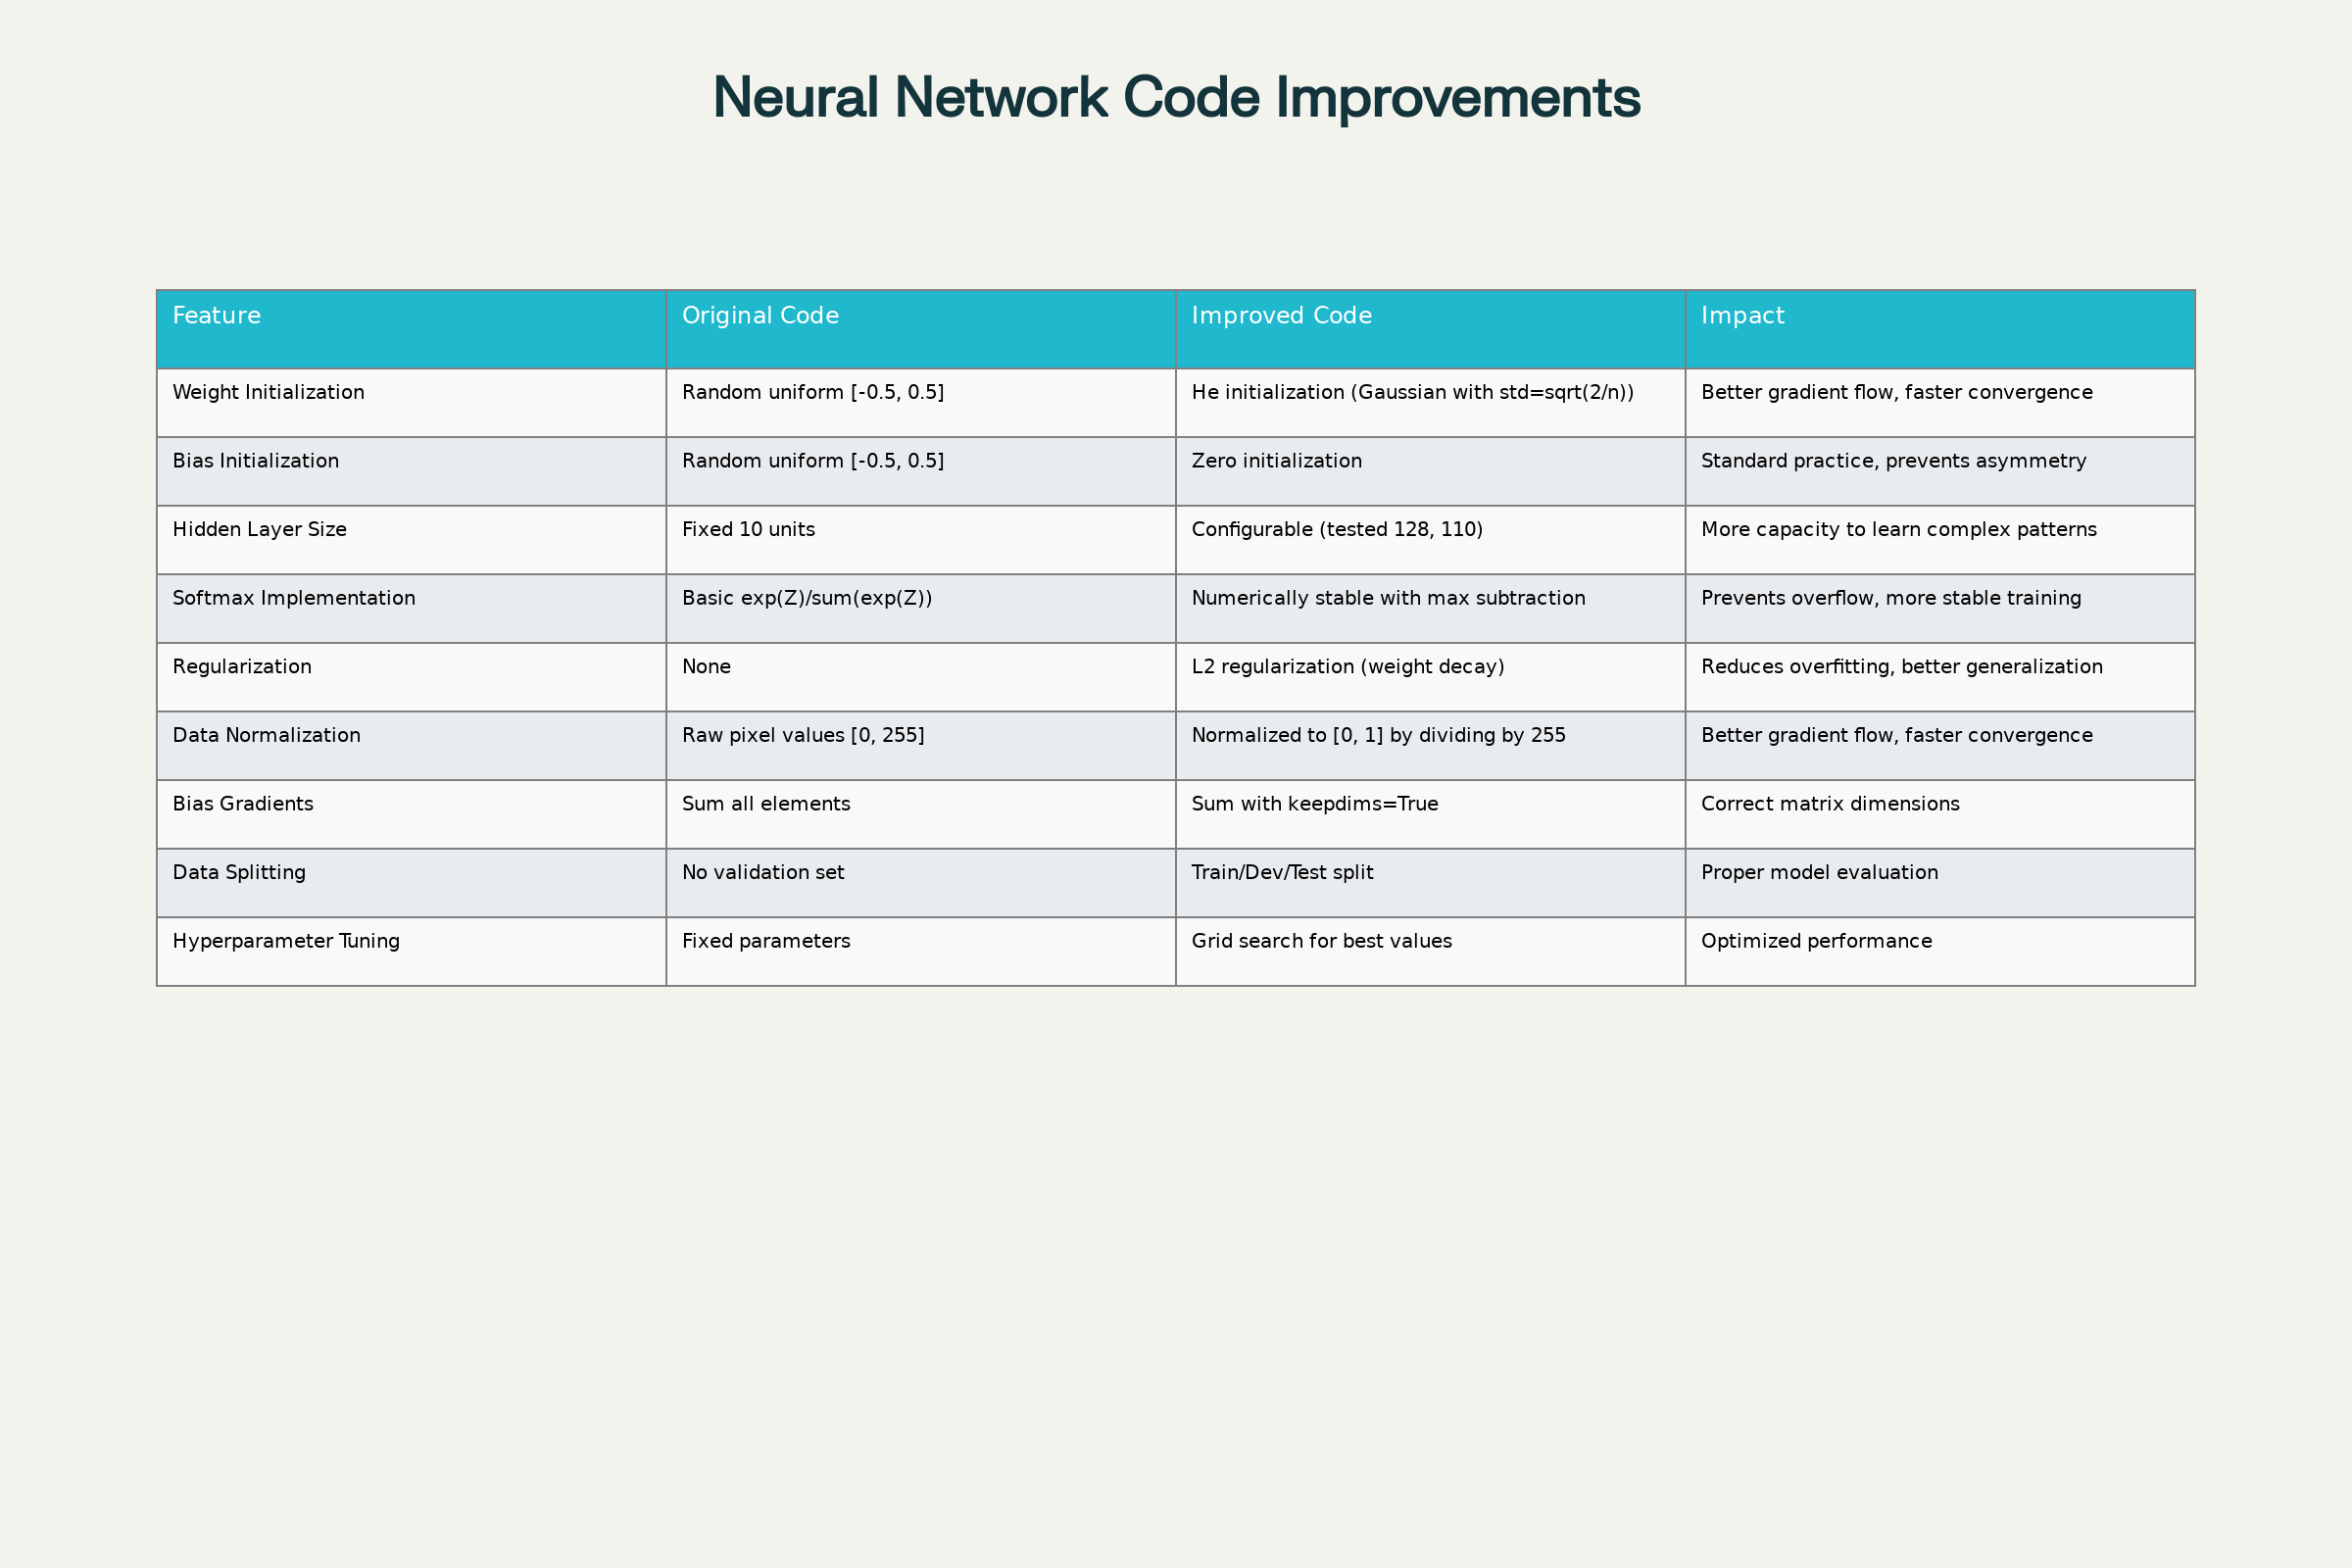

In [83]:
new_data_test = df[1000:2000].T
Y_test = new_data_test[0]
X_test = new_data_test[1:n]
X_test = X_test/255. 

new_data_train = df[2000:m].T 
y_train = new_data_train[0]
X_train = new_data_train[1:n]
X_train = X_train/255.

He Initialization (Most Critical)

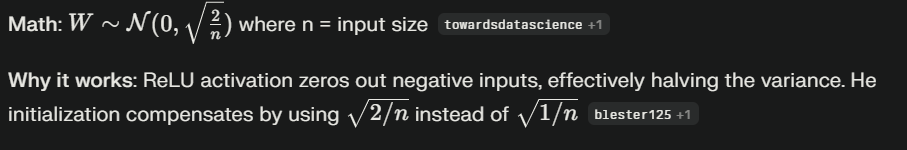

In [93]:
def init_params(hidden_size=128):
    # Without scaling, deeper layers can suffer from:
    # Exploding activations: if weights are too large
    # Vanishing activations: if weights are too small
    W1 = np.random.randn(hidden_size, 784) * np.sqrt(2 / 784)
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(10, hidden_size) * np.sqrt(2 / hidden_size)
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

In [94]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [95]:
def Sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

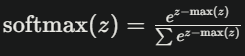

In [96]:
# Numerically Stable Softmax (Prevents Overflow)
# Why: Subtracting max ensures largest exponent is 0, 
# preventing overflow while keeping mathematically identical result
def softmax(Z):
    Z_shift = Z - np.max(Z, axis=0, keepdims=True)
    exp_Z = np.exp(Z_shift)
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

In [97]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [98]:
def ReLU_deriv(Z):
    return Z > 0

In [99]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

L2 Regularization (Prevents Overfitting)
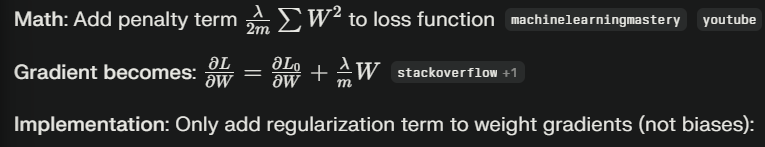

In [106]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, one_hot_Y, lambd):
    m = X.shape[1]
    
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)# No regularization on output weights
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True) # shape: (10,1)# Fixed bias gradient

    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T) + (lambd / m) * W1 # ADDED L2 REGULARIZATION HERE
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True) # Fixed bias gradient
    return dW1, db1, dW2, db2

In [107]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2  
    b2 -= alpha * db2
    return W1, b1, W2, b2

In [108]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [102]:
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

In [109]:
def gradient_descent(X, Y, alpha, iterations, lambd=0, hidden_size=10):
    W1, b1, W2, b2 = init_params(hidden_size)
    one_hot_Y = one_hot(Y)
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, one_hot_Y, lambd)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 500 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [110]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 0.1, 501, 0)

Iteration:  0
0.10825
Iteration:  500
0.906875


In [111]:
def evaluate_model(W1, b1, W2, b2, X_val, Y_val):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X_val)
    predictions = get_predictions(A2)
    print("Predictions:", predictions[:10])
    print("Y_test     :", Y_val[:10])
    print("Shape of predictions:", predictions.shape)
    print("Shape of Y_test     :", Y_val.shape)
    return get_accuracy(predictions, Y_val)

In [112]:
dev_accuracy = evaluate_model(W1, b1, W2, b2, X_dev, Y_dev)
test_accuracy = evaluate_model(W1, b1, W2, b2, X_test, Y_test)
print("Dev Accuracy:", dev_accuracy)
print("Test Accuracy:", test_accuracy)

Predictions: [6 9 7 0 5 8 9 7 7 7]
Y_test     : [6 9 7 0 5 8 7 7 7 7]
Shape of predictions: (1000,)
Shape of Y_test     : (1000,)
Predictions: [3 3 9 5 7 4 9 4 0 5]
Y_test     : [3 3 9 5 7 4 9 4 0 5]
Shape of predictions: (1000,)
Shape of Y_test     : (1000,)
Dev Accuracy: 0.896
Test Accuracy: 0.923


In [114]:
def find_best_hidden_size(X_train, Y_train, X_val, Y_val, alpha, iterations, lambd, hidden_sizes):
    best_size = None
    best_accuracy = 0
    results = []

    for size in hidden_sizes:
        print(f"\nTraining with hidden layer size = {size}")
        W1, b1, W2, b2 = gradient_descent(X_train, Y_train, alpha, iterations, lambd, hidden_size=size)
        acc = evaluate_model(W1, b1, W2, b2, X_val, Y_val)
        results.append((size, acc))
        print(f"Validation Accuracy: {acc:.4f}")
        if acc > best_accuracy:
            best_accuracy = acc
            best_size = size

    print(f"\n✅ Best hidden size: {best_size} with accuracy: {best_accuracy:.4f}")
    return best_size, results

hidden_sizes = [128, 110]
best_size, results = find_best_hidden_size(X_train, y_train, X_dev, Y_dev, alpha=0.1, iterations=500, lambd=0, hidden_sizes=hidden_sizes)


Training with hidden layer size = 128
Iteration:  0
0.136275
Predictions: [6 9 7 0 9 8 7 7 7 7]
Y_test     : [6 9 7 0 5 8 7 7 7 7]
Shape of predictions: (1000,)
Shape of Y_test     : (1000,)
Validation Accuracy: 0.9120

Training with hidden layer size = 110
Iteration:  0
0.0619
Predictions: [6 9 7 0 5 8 7 7 7 7]
Y_test     : [6 9 7 0 5 8 7 7 7 7]
Shape of predictions: (1000,)
Shape of Y_test     : (1000,)
Validation Accuracy: 0.9160

✅ Best hidden size: 110 with accuracy: 0.9160


In [115]:
def evaluate_model(W1, b1, W2, b2, X_val, Y_val):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X_val)
    predictions = get_predictions(A2)
    print("Predictions:", predictions[:10])
    print("Y_test     :", Y_val[:10])
    print("Shape of predictions:", predictions.shape)
    print("Shape of Y_test     :", Y_val.shape)
    return get_accuracy(predictions, Y_val)

In [116]:
def find_best_lambda(X_train, Y_train, X_val, Y_val, alpha, iterations, lambdas, hidden_size):
    best_lambda = None
    best_accuracy = 0
    results = []

    for lambd in lambdas:
        print(f"Training with lambda = {lambd}")
        W1, b1, W2, b2 = gradient_descent(X_train, Y_train, alpha, iterations, lambd, hidden_size)
        acc = evaluate_model(W1, b1, W2, b2, X_val, Y_val)
        results.append((lambd, acc))
        print(f"Validation Accuracy: {acc:.4f}")
        if acc > best_accuracy:
            best_accuracy = acc
            best_lambda = lambd

    print(f"\n✅ Best lambda: {best_lambda} with accuracy: {best_accuracy:.4f}")
    return best_lambda, results

lambdas = [0.01, 0.1, 1, 2]
best_lambda, results = find_best_lambda(X_train, y_train, X_test, Y_test, 0.1, 501, lambdas, 110)

Training with lambda = 0.01
Iteration:  0
0.073725
Iteration:  500
0.924825
Predictions: [3 3 9 5 7 4 9 4 0 5]
Y_test     : [3 3 9 5 7 4 9 4 0 5]
Shape of predictions: (1000,)
Shape of Y_test     : (1000,)
Validation Accuracy: 0.9370
Training with lambda = 0.1
Iteration:  0
0.122175
Iteration:  500
0.92405
Predictions: [3 3 9 5 7 4 4 4 0 5]
Y_test     : [3 3 9 5 7 4 9 4 0 5]
Shape of predictions: (1000,)
Shape of Y_test     : (1000,)
Validation Accuracy: 0.9330
Training with lambda = 1
Iteration:  0
0.116325
Iteration:  500
0.92395
Predictions: [3 3 9 5 7 4 9 4 0 5]
Y_test     : [3 3 9 5 7 4 9 4 0 5]
Shape of predictions: (1000,)
Shape of Y_test     : (1000,)
Validation Accuracy: 0.9380
Training with lambda = 2
Iteration:  0
0.089925
Iteration:  500
0.924325
Predictions: [3 3 9 5 7 4 9 4 0 5]
Y_test     : [3 3 9 5 7 4 9 4 0 5]
Shape of predictions: (1000,)
Shape of Y_test     : (1000,)
Validation Accuracy: 0.9370

✅ Best lambda: 1 with accuracy: 0.9380
